<h1 align=center><font size = 5>Clustering Significant Earthquakes in Japan with DBSCAN</font></h1>

<br>

<img src="https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iUycfdaMMr1k/v1/-1x-1.jpg" width=1000 height=600 alt="https://www.bloomberg.com/">

<small>Picture Source: <a href="https://www.bloomberg.com/">bloomberg</a>

<br>

<h2>Data Description</h2>

<br>

<h3>Context</h3>

<p>The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.</p>

<br>

<h3>Content</h3>

<p>This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported <b>magnitude 5.5 or higher since 1965</b>.</p>

<br>

<h3>Dataset Link</h3>

You can download or take a look at original website of the dataset: [Kaggle](https://www.kaggle.com/datasets/usgs/earthquake-database)

<br>

<h3>License</h3>
<p>CC0: Public Domain</p>

<br>

<h3>Keywords</h3>
<ul>
  <li>Geology</li>
  <li>Earth Science</li>
  <li>Earthquake</li>
  <li>Japan</li>
</ul>

<br>

<h3>License</h3>    
<p>CC BY-SA 4.0</p>

<br>
    
<h3>Sources</h3>
<ul>
    <li><a href="https://www.kaggle.com/datasets/usgs/earthquake-database">Kaggle</a></li>
    <li><a href="https://www.bloomberg.com/news/articles/2019-06-18/magnitude-6-8-quake-hits-off-japan-tsunami-advisory-issued">Bloomberg</a></li>
</ul>

<hr>

<h2>Objective for This Notebook</h2>

Within the scope of this project, a clustering task was done. With density based clustering, we were trying to classify or make cluster of points (based of their location, earthquake depth and magnitude).

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#item11">Importing Libraries</a></li>
<li><a href="https://#item12">Load the Dataset</a></li>
<li><a href="https://#item13">Visualization</a></li>

<br>

<p>Estimated Time Needed: <strong>25 min</strong></p>

</div>

<hr>

<a id='item11'></a>

<h2>Importing Libraries</h2>

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

<a id='item12'></a>

<h2>Load the Dataset</h2>


You can download the data from [Kaggle](https://www.kaggle.com/datasets/vinayakshanawad/weedcrop-image-dataset). After downloading and importing process, we can unzip.

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: database.csv            


In [3]:
filename='database.csv'

<p>Let's take a look at our dataset</p>

In [4]:
pdf = pd.read_csv(filename)

In [5]:
pdf.dropna(subset=['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Source'])

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

In [6]:
pdf.head(10)

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   
5  01/10/1965  13:36:32   -13.405    166.629  Earthquake   35.0          NaN   
6  01/12/1965  13:32:25    27.357     87.867  Earthquake   20.0          NaN   
7  01/15/1965  23:17:42   -13.309    166.212  Earthquake   35.0          NaN   
8  01/16/1965  11:32:37   -56.452    -27.043  Earthquake   95.0          NaN   
9  01/17/1965  10:43:17   -24.563    178.487  Earthquake  565.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   
5                     NaN        6.7             MW  ...   
6                     NaN        5.9             MW  ...   
7                     NaN        6.0             MW  ...   
8                     NaN        6.0             MW  ...   
9                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   
5                         NaN            NaN                  NaN   
6                         NaN            NaN                  NaN   
7                         NaN            NaN                  NaN   
8                         NaN            NaN                  NaN   
9                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square               ID     Source  \
0               NaN               NaN     ISCGEM860706     ISCGEM   
1               NaN               NaN     ISCGEM860737     ISCGEM   
2               NaN               NaN     ISCGEM860762     ISCGEM   
3               NaN               NaN     ISCGEM860856     ISCGEM   
4               NaN               NaN     ISCGEM860890     ISCGEM   
5               NaN               NaN     ISCGEM860922     ISCGEM   
6               NaN               NaN     ISCGEM861007     ISCGEM   
7               NaN               NaN     ISCGEM861111     ISCGEM   
8               NaN               NaN  ISCGEMSUP861125  ISCGEMSUP   
9               NaN               NaN     ISCGEM861148     ISCGEM   

  Location Source Magnitude Source     Status  
0          ISCGEM           ISCGEM  Automatic  
1          ISCGEM           ISCGEM  Automatic  
2          ISCGEM           ISCGEM  Automatic  
3          ISCGEM           ISCGEM  Automatic  
4          ISCGEM           ISCGEM  Automatic  
5          ISCGEM           ISCGEM  Automatic  
6          ISCGEM           ISCGEM  Automatic  
7          ISCGEM           ISCGEM  Automatic  
8          ISCGEM           ISCGEM  Automatic  
9          ISCGEM           ISCGEM  Automatic  

[10 rows x 21 columns]

In [7]:
pdf.tail(10)

Date      Time  Latitude  Longitude        Type  Depth  \
23402  12/24/2016  03:58:55   -5.1460   153.5166  Earthquake  30.00   
23403  12/25/2016  14:22:27  -43.4029   -73.9395  Earthquake  38.00   
23404  12/25/2016  14:32:13  -43.4810   -74.4771  Earthquake  14.93   
23405  12/27/2016  23:20:56   45.7192    26.5230  Earthquake  97.00   
23406  12/28/2016  08:18:01   38.3754  -118.8977  Earthquake  10.80   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake  12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake   8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake  10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake  79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake  11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
23402          1.8                     NaN        5.8            MWW  ...   
23403          1.9                     NaN        7.6            MWW  ...   
23404          3.3                     NaN        5.6             MB  ...   
23405          1.8                     NaN        5.6            MWW  ...   
23406          1.3                    34.0        5.6             ML  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
23402                         NaN          14.00                1.648   
23403                         NaN          29.00                0.351   
23404                        83.0          96.00                0.697   
23405                         NaN          14.00                0.465   
23406                        20.0          35.86                0.132   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square          ID Source Location Source  \
23402               7.0            0.8500  US10007MFP     US              US   
23403               6.8            0.8000  US10007MN3     US              US   
23404               7.1            0.5200  US10007MNB     US              US   
23405               5.1            0.7800  US10007N3R     US              US   
23406               NaN            0.1988  NN00570709     NN              NN   
23407               NaN            0.1898  NN00570710     NN              NN   
23408               NaN            0.2187  NN00570744     NN              NN   
23409               4.8            1.5200  US10007NAF     US              US   
23410               6.0            1.4300  US10007NL0     US              US   
23411               4.5            0.9100  US10007NTD     US              US   

      Magnitude Source    Status  
23402               US  Reviewed  
23403               US  Reviewed  
23404               US  Reviewed  
23405               US  Reviewed  
23406               NN  Reviewed  
23407               NN  Reviewed  
23408               NN  Reviewed  
23409               US  Reviewed  
23410               US  Reviewed  
23411               US  Reviewed  

[10 rows x 21 columns]

In [8]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

<a id='item13'></a>

<h2>Visualization</h2>

<p>The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.</p>

In [9]:
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

<p>Approximate coordinates of Japan</p>

In [11]:
llon=122.77
ulon=153.14
llat=23.03
ulat=50.54

In [12]:
print(f"llon: {llon}")
print(f"ulon: {ulon}")
print(f"llat: {llat}")
print(f"ulat: {ulat}")

llon: 122.77
ulon: 153.14
llat: 23.03
ulat: 50.54


In [13]:
pdf = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

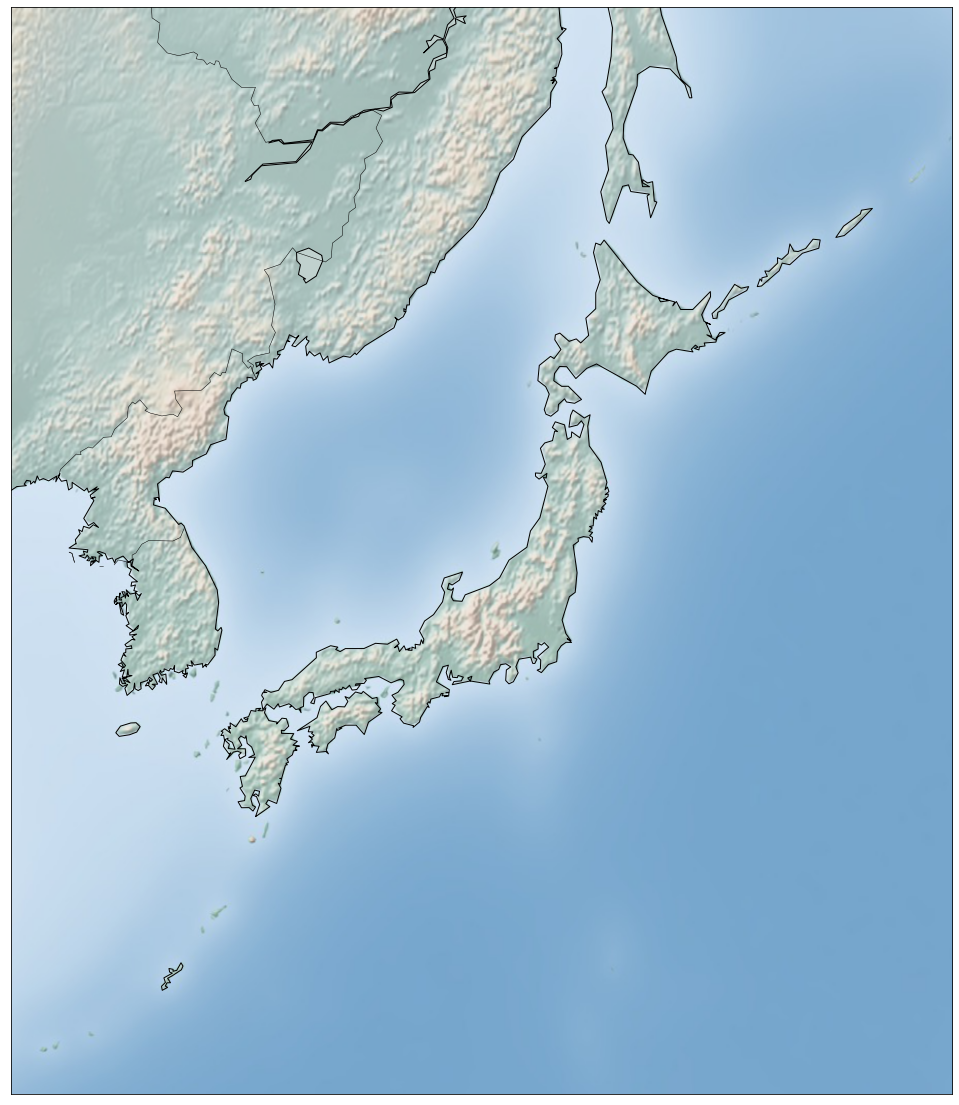

In [14]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

In [15]:
xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

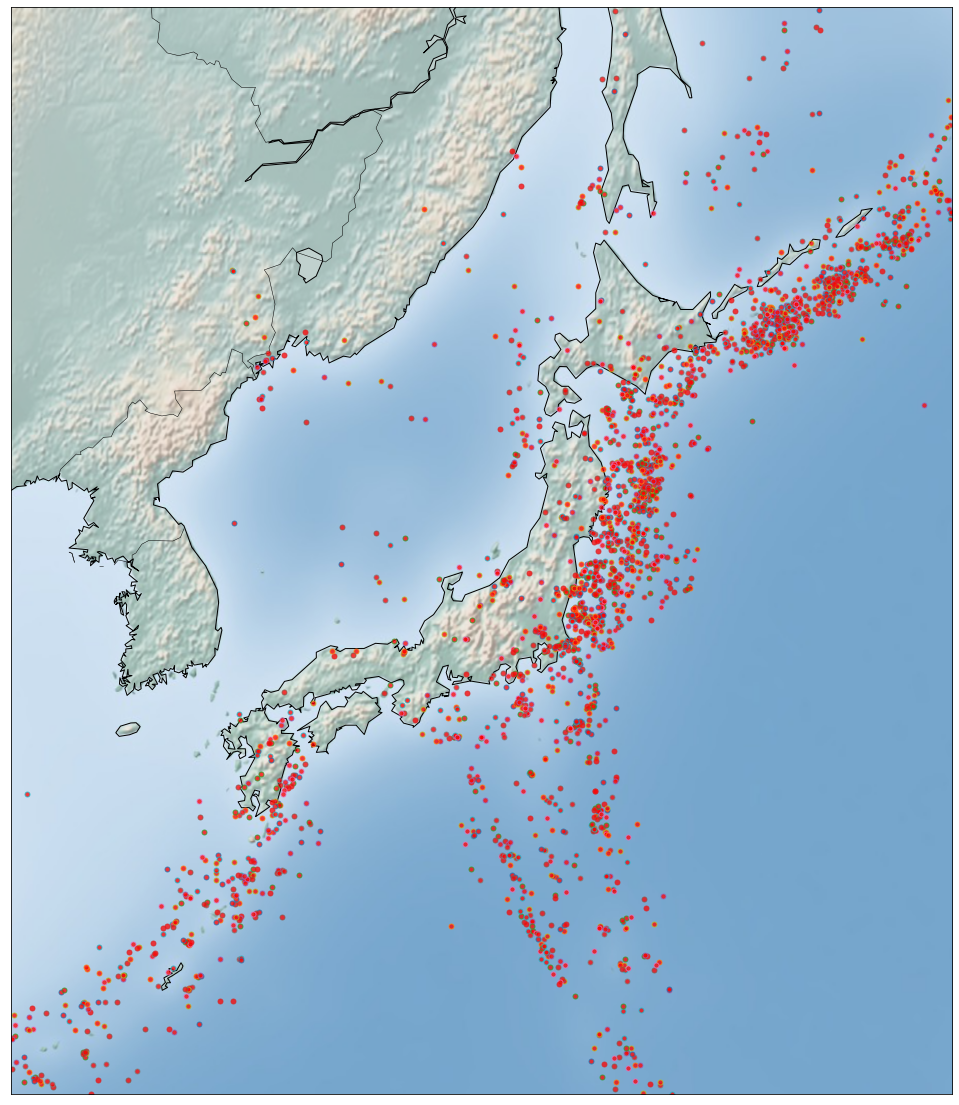

In [16]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
for index, row in pdf.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([1, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

<h3>Clustering of Stations Based on Their Location i.e. Lat & Lon</h3>

<p><i>DBSCAN</i> form sklearn library can run <i>DBSCAN</i> clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them.</p>

In [17]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [18]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

Computing DBSCAN.

In [19]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [20]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

A sample of clusters:

In [22]:
pdf[["Source", "Depth", "Clus_Db"]].head(5)

Source  Depth  Clus_Db
55   ISCGEM   53.5        0
89   ISCGEM   32.1        0
101  ISCGEM   30.0        0
110  ISCGEM   39.2        0
111  ISCGEM   50.0        0

In [23]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

<h3>Visualization of Clusters Based on Location</h3>

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Cluster 0, Avg Depth: 63.55876483279396
Cluster 1, Avg Depth: 52.31665529010238
Cluster 2, Avg Depth: 138.70689655172413
Cluster 3, Avg Depth: 397.0846153846153
Cluster 4, Avg Depth: 66.68888888888888
Cluster 5, Avg Depth: 546.7666666666665
Cluster 6, Avg Depth: 56.60666666666666
Cluster 7, Avg Depth: 109.25714285714287


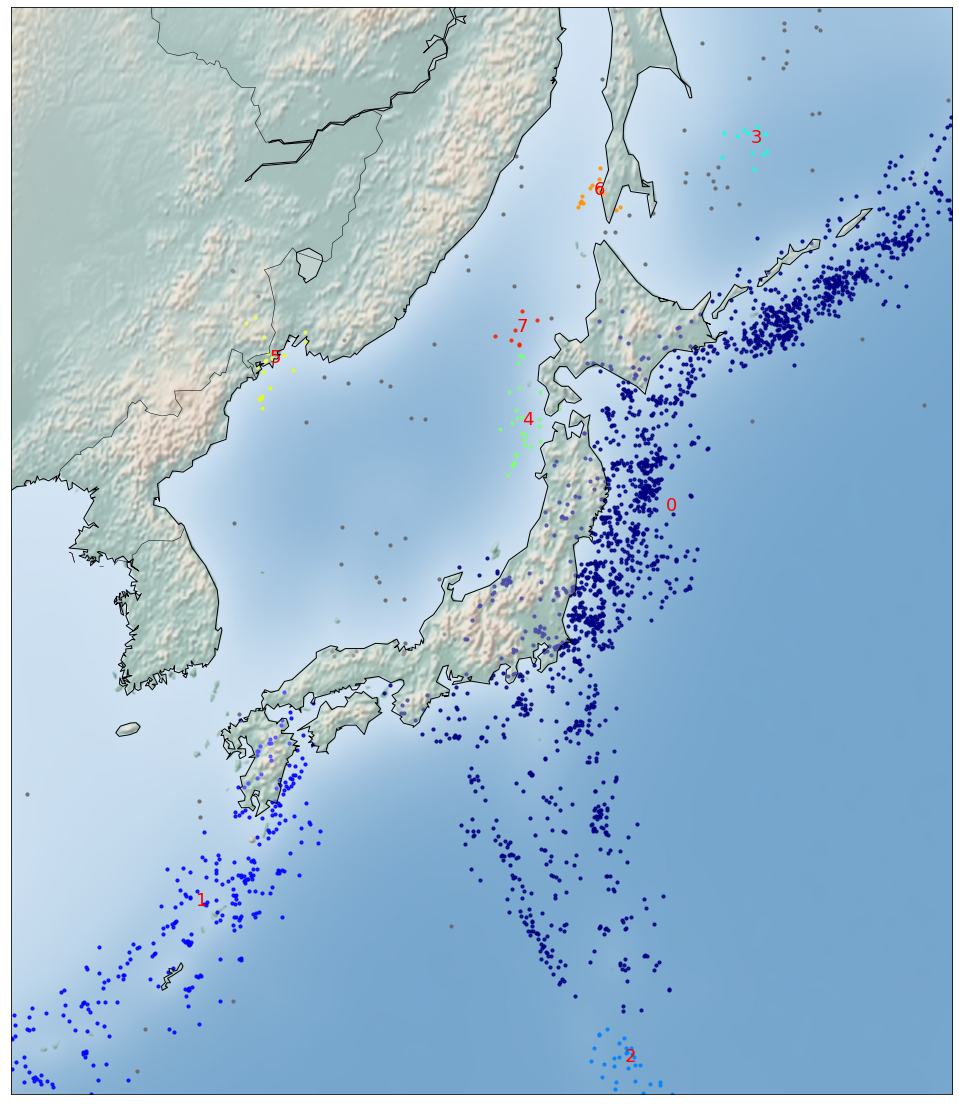

In [25]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.Depth)))

<h3>Clustering of Sources Based on Their Location i.e. Lat & Lon and Depth</h3>

In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [27]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym', 'Depth']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [28]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [29]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [31]:
pdf[["Source", "Depth", "Clus_Db"]].head(5)

Source  Depth  Clus_Db
55   ISCGEM   53.5        0
89   ISCGEM   32.1        0
101  ISCGEM   30.0        0
110  ISCGEM   39.2        0
111  ISCGEM   50.0        0

<h3>Visualization of Clusters Based on Location and Depth</h3>

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Cluster 0, Avg Depth: 35.21208852005533
Cluster 1, Avg Depth: 425.332
Cluster 2, Avg Depth: 33.23529411764706
Cluster 3, Avg Depth: 36.37571428571429
Cluster 4, Avg Depth: 12.736363636363638
Cluster 5, Avg Depth: 12.399999999999999
Cluster 6, Avg Depth: 14.634146341463415
Cluster 7, Avg Depth: 25.42941176470588
Cluster 8, Avg Depth: 25.353846153846153
Cluster 9, Avg Depth: 30.166666666666668
Cluster 10, Avg Depth: 14.976923076923079
Cluster 11, Avg Depth: 477.3016666666666
Cluster 12, Avg Depth: 25.321428571428566
Cluster 13, Avg Depth: 32.46
Cluster 14, Avg Depth: 13.557142857142855
Cluster 15, Avg Depth: 9.768


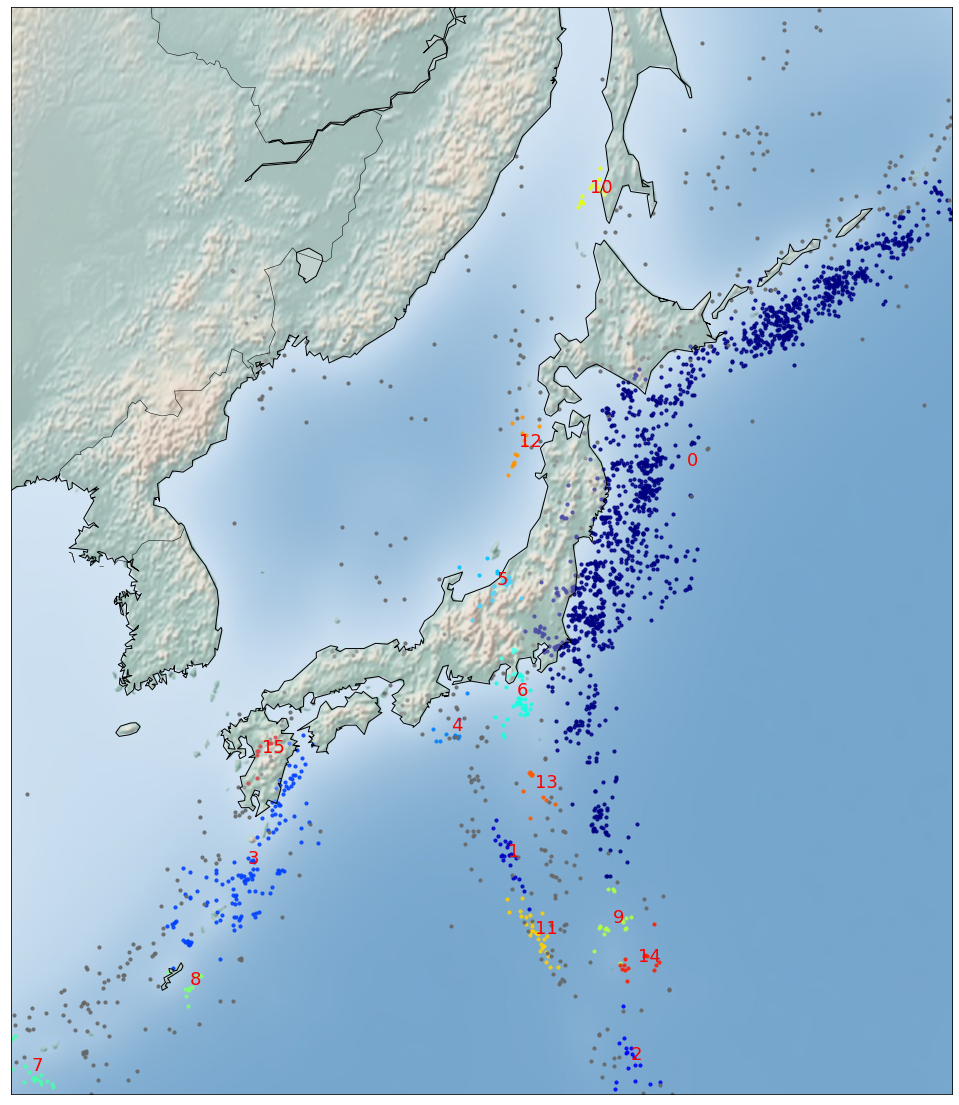

In [33]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.Depth)))

<h3>Visualization of Clusters Based on Location and Magnitude</h3>

In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [35]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [36]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [37]:
labels

array([ 0, -1, -1, ...,  6,  6, 18])

In [38]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [39]:
pdf[["Source", "Magnitude", "Clus_Db"]].head(5)

Source  Magnitude  Clus_Db
55   ISCGEM        5.7        0
89   ISCGEM        6.4       -1
101  ISCGEM        6.4       -1
110  ISCGEM        5.7        1
111  ISCGEM        5.7        0

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Cluster 0, Avg Magnitude: 5.700000000000002
Cluster 1, Avg Magnitude: 5.7
Cluster 2, Avg Magnitude: 5.5
Cluster 3, Avg Magnitude: 5.600000000000001
Cluster 4, Avg Magnitude: 5.6000000000000005
Cluster 5, Avg Magnitude: 5.799999999999999
Cluster 6, Avg Magnitude: 5.8999999999999995
Cluster 7, Avg Magnitude: 5.599999999999999
Cluster 8, Avg Magnitude: 6.0
Cluster 9, Avg Magnitude: 5.6000000000000005
Cluster 10, Avg Magnitude: 5.700000000000001
Cluster 11, Avg Magnitude: 6.0
Cluster 12, Avg Magnitude: 6.099999999999998
Cluster 13, Avg Magnitude: 5.900000000000001
Cluster 14, Avg Magnitude: 6.1
Cluster 15, Avg Magnitude: 6.200000000000001
Cluster 16, Avg Magnitude: 5.800000000000001
Cluster 17, Avg Magnitude: 6.0
Cluster 18, Avg Magnitude: 5.5
Cluster 19, Avg Magnitude: 5.900000000000002
Cluster 20, Avg Magnitude: 5.700000000000001
Cluster 21, Avg Magnitude: 6.1000000000000005


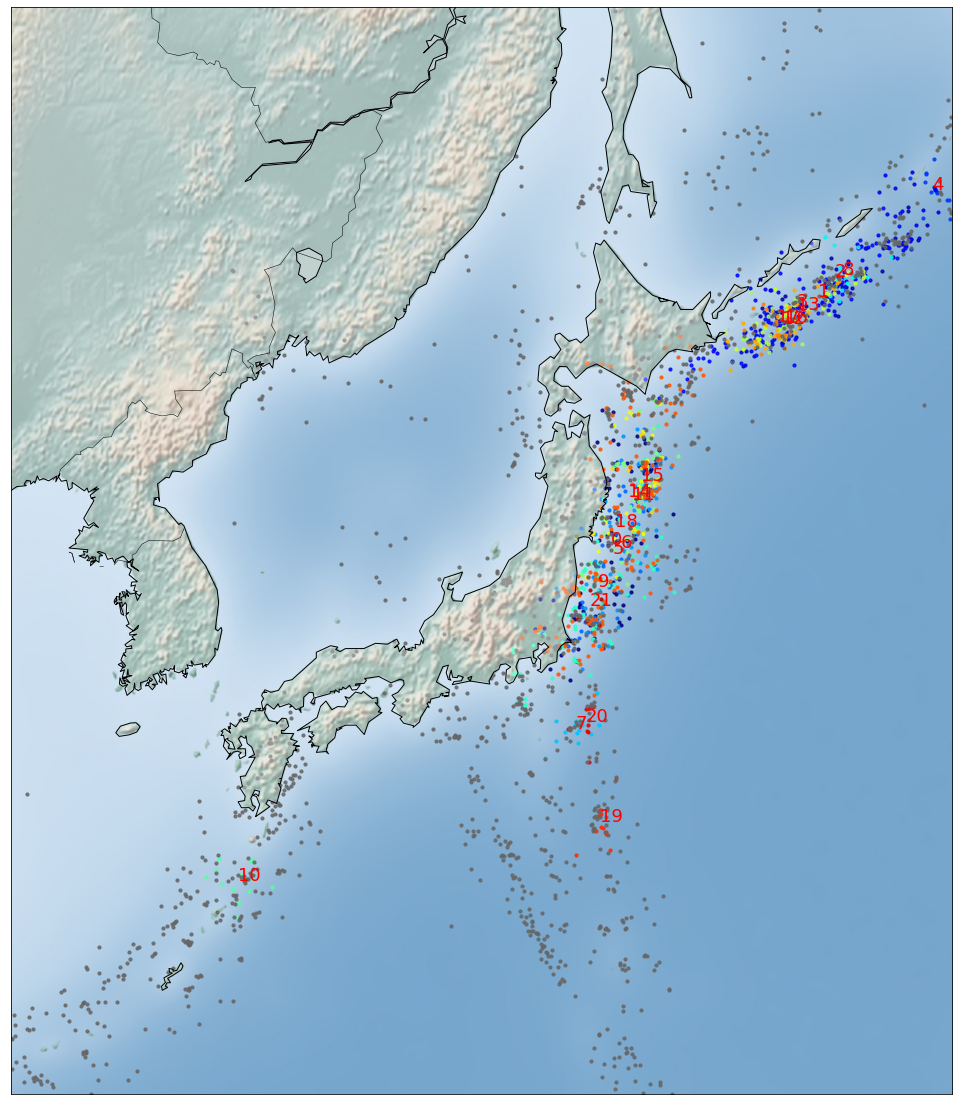

In [41]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

<hr>

<h1>Contact Me<h1>

<p>If you have something to say to me please contact me:<p>

*   Twitter: https://twitter.com/Doguilmak
*   Mail address: doguilmak@gmail.com